In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df= pd.read_csv('covid.csv')
df.head()

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe
2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa
3,Andorra,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,Europe
4,Angola,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa


In [6]:
df.shape

(187, 15)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country/Region          187 non-null    object 
 1   Confirmed               187 non-null    int64  
 2   Deaths                  187 non-null    int64  
 3   Recovered               187 non-null    int64  
 4   Active                  187 non-null    int64  
 5   New cases               187 non-null    int64  
 6   New deaths              187 non-null    int64  
 7   New recovered           187 non-null    int64  
 8   Deaths / 100 Cases      187 non-null    float64
 9   Recovered / 100 Cases   187 non-null    float64
 10  Deaths / 100 Recovered  187 non-null    float64
 11  Confirmed last week     187 non-null    int64  
 12  1 week change           187 non-null    int64  
 13  1 week % increase       187 non-null    float64
 14  WHO Region              187 non-null    ob

In [8]:
df.isnull().sum()

Country/Region            0
Confirmed                 0
Deaths                    0
Recovered                 0
Active                    0
New cases                 0
New deaths                0
New recovered             0
Deaths / 100 Cases        0
Recovered / 100 Cases     0
Deaths / 100 Recovered    0
Confirmed last week       0
1 week change             0
1 week % increase         0
WHO Region                0
dtype: int64

In [9]:
df.duplicated().sum()

0

In [10]:
df.columns

Index(['Country/Region', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'New cases', 'New deaths', 'New recovered', 'Deaths / 100 Cases',
       'Recovered / 100 Cases', 'Deaths / 100 Recovered',
       'Confirmed last week', '1 week change', '1 week % increase',
       'WHO Region'],
      dtype='object')

# Which country have highest number of confirmed cases

In [12]:
df_high = df.nlargest(10, 'Confirmed')
df_high

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
173,US,4290259,148011,1325804,2816444,56336,1076,27941,3.45,30.90,11.16,3834677,455582,11.88,Americas
23,Brazil,2442375,87618,1846641,508116,23284,614,33728,3.59,75.61,4.74,2118646,323729,15.28,Americas
79,India,1480073,33408,951166,495499,44457,637,33598,2.26,64.26,3.51,1155338,324735,28.11,South-East Asia
138,Russia,816680,13334,602249,201097,5607,85,3077,1.63,73.74,2.21,776212,40468,5.21,Europe
154,South Africa,452529,7067,274925,170537,7096,298,9848,1.56,60.75,2.57,373628,78901,21.12,Africa
111,Mexico,395489,44022,303810,47657,4973,342,8588,11.13,76.82,14.49,349396,46093,13.19,Americas
132,Peru,389717,18418,272547,98752,13756,575,4697,4.73,69.93,6.76,357681,32036,8.96,Americas
35,Chile,347923,9187,319954,18782,2133,75,1859,2.64,91.96,2.87,333029,14894,4.47,Americas
177,United Kingdom,301708,45844,1437,254427,688,7,3,15.19,0.48,3190.26,296944,4764,1.60,Europe
81,Iran,293606,15912,255144,22550,2434,212,1931,5.42,86.90,6.24,276202,17404,6.30,Eastern Mediterranean


Text(0.5, 1.0, 'Top 10 countries with highest number of confirmed cases')

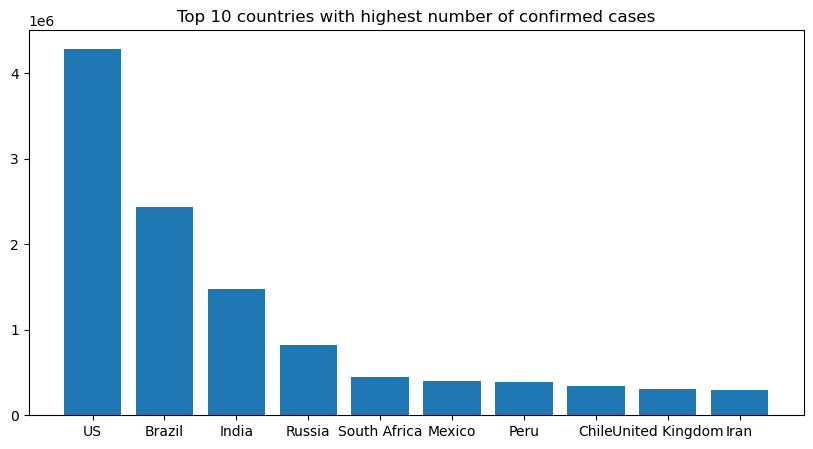

In [13]:
plt.figure(figsize=(10,5))
plt.bar(df_high['Country/Region'],df_high['Confirmed'])
plt.title("Top 10 countries with highest number of confirmed cases")

# What was the distribution of confirmed cases across different WHO regions?


In [15]:
df['WHO Region'].unique()


array(['Eastern Mediterranean', 'Europe', 'Africa', 'Americas',
       'Western Pacific', 'South-East Asia'], dtype=object)

In [16]:
region_data= df.groupby('WHO Region')['Confirmed'].sum()
region_data


WHO Region
Africa                    723207
Americas                 8839286
Eastern Mediterranean    1490744
Europe                   3299523
South-East Asia          1835297
Western Pacific           292428
Name: Confirmed, dtype: int64

([<matplotlib.patches.Wedge at 0x19b19f5b620>,
 [Text(1.0895633835682452, 0.15116756658528618, 'Africa'),
  Text(-0.41812108210856064, 1.0174353840398744, 'Americas'),
  Text(-0.7755718902460277, -0.7800565640132796, 'Eastern Mediterranean'),
  Text(0.14328406195834426, -1.0906281114975525, 'Europe'),
  Text(0.9850016264679414, -0.48966498328501107, 'South-East Asia'),
  Text(1.0982913669908447, -0.06128681092520522, 'Western Pacific')],
 [Text(0.5943073001281337, 0.082455036319247, '4.4%'),
  Text(-0.22806604478648757, 0.5549647549308405, '53.6%'),
  Text(-0.4230392128614696, -0.4254853985526979, '9.0%'),
  Text(0.0781549428863696, -0.5948880608168466, '20.0%'),
  Text(0.5372736144370589, -0.2670899908827333, '11.1%'),
  Text(0.5990680183586424, -0.03342916959556648, '1.8%')])

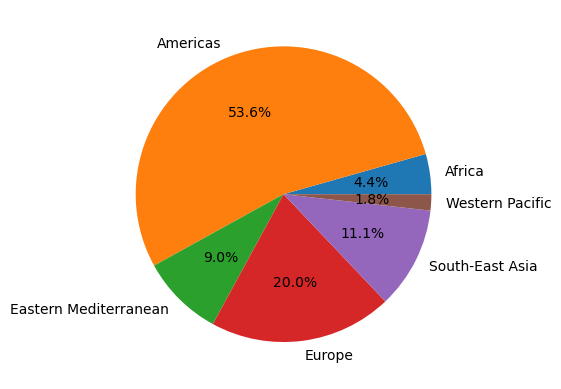

In [17]:
plt.pie(region_data, labels= region_data.index,autopct='%1.1f%%')

# What were the trends in new cases, new deaths, and new recoveries in each country?

Text(0, 0.5, 'New Deaths')

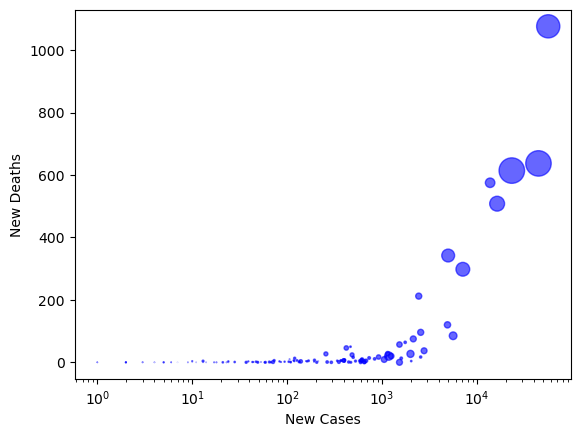

In [49]:
plt.scatter(df['New cases'],df['New deaths'], s= df['New recovered'] / 100, color = 'blue',alpha = 0.6)
plt.xscale('log')
plt.xlabel('New Cases')
plt.ylabel('New Deaths')

# Global Death Distribution (Top 5)

In [102]:
# A few countries (e.g., USA, Brazil, India, Mexico, UK) contribute to over 60% of global COVID-19 deaths.

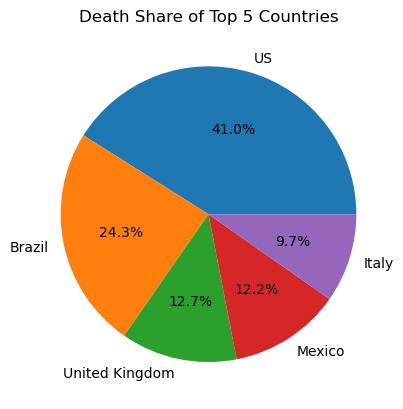

In [85]:
top_deaths = df.sort_values('Deaths', ascending=False).head(5)
plt.pie(top_deaths['Deaths'], labels=top_deaths['Country/Region'], autopct='%1.1f%%')
plt.title("Death Share of Top 5 Countries")
plt.show()


# Correlation Between Metrics (Heatmap)

In [ ]:
#Higher confirmed cases often lead to more recoveries and deaths. Countries with better healthcare tend to have higher recovery rates and lower mortality.

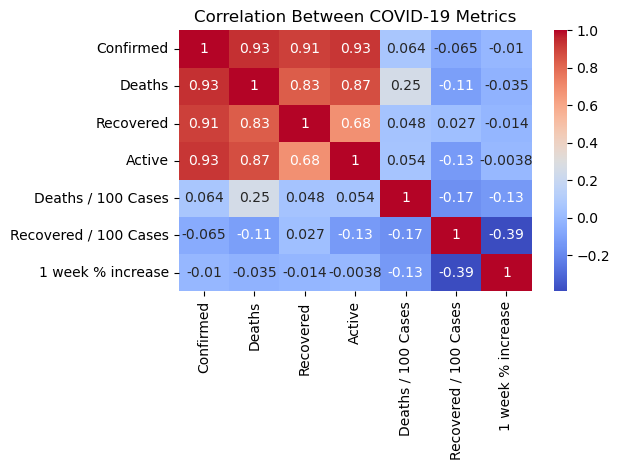

In [99]:
plt.figure()
corr = df[[
    "Confirmed", "Deaths", "Recovered", "Active",
    "Deaths / 100 Cases", "Recovered / 100 Cases", "1 week % increase"
]].corr()

sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Between COVID-19 Metrics")
plt.tight_layout()
plt.show()

# Mortality Rate vs Confirmed Cases (Scatter Plot) 

<Axes: xlabel='Confirmed', ylabel='Deaths / 100 Cases'>

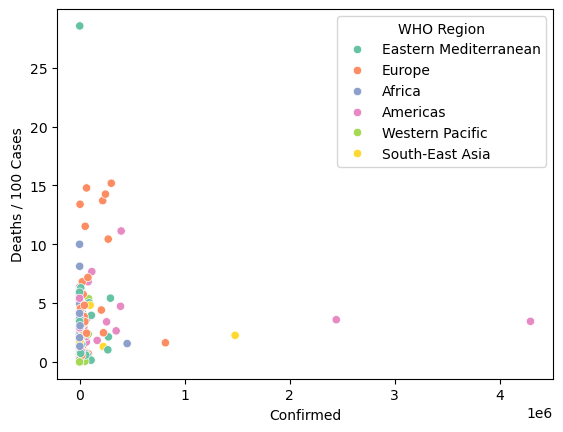

In [97]:
plt.figure()
sns.scatterplot(
    x="Confirmed",
    y="Deaths / 100 Cases",
    data=df,
    hue="WHO Region",
    palette="Set2"
)

# Week % Increase by WHO Region (Box Plot)

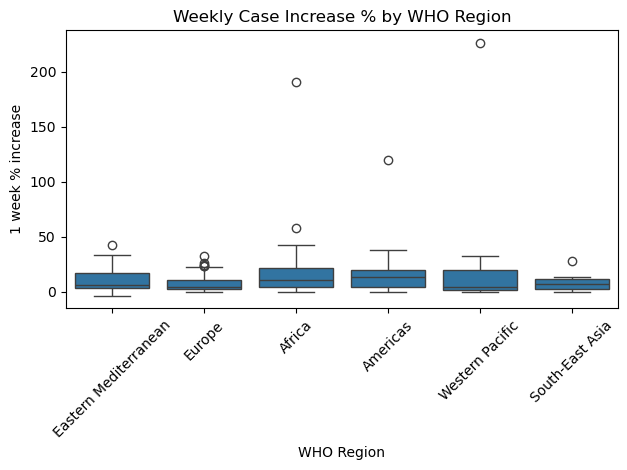

In [94]:
plt.figure()
sns.boxplot(x="WHO Region", y="1 week % increase", data=df)
plt.xticks(rotation=45)
plt.title("Weekly Case Increase % by WHO Region")
plt.tight_layout()
plt.show()
